# Student Performance Indicator

## Problem State

This project understands how the students performance is affected by othe variables such as Gender, Ethnicity Parent level of education, Lunch and Tets prep course.

## Data Collection

Dataset Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetid=74977

The data consists of 8 column and 1000 rows.

## Dataset Information:

1. gender: Sex of Students
2. race/ethnicity: ethnicity of students-> (Group A,B,C,D,E)
3. Parents Level of education: Parent's final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
4. lunch: having lunch before test.
5. test preparation course: complete or not complete before test.
6. math score.
7. reading score.
8. Writing score.

In [41]:
##import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
## reading the dataset
df = pd.read_csv('E:\\Machine learning END to END project\\ml_end_to_end_project\\data\\Raw\\stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Exploring the dataset

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [44]:
## checking for missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values

In [45]:
## checking Duplicates of the datasets.
df.duplicated().sum()

0

In [46]:
## Checking the unique values 
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## Univariate Analysis

plotting charts to analyze each feature

performing descriptive analysis on the features

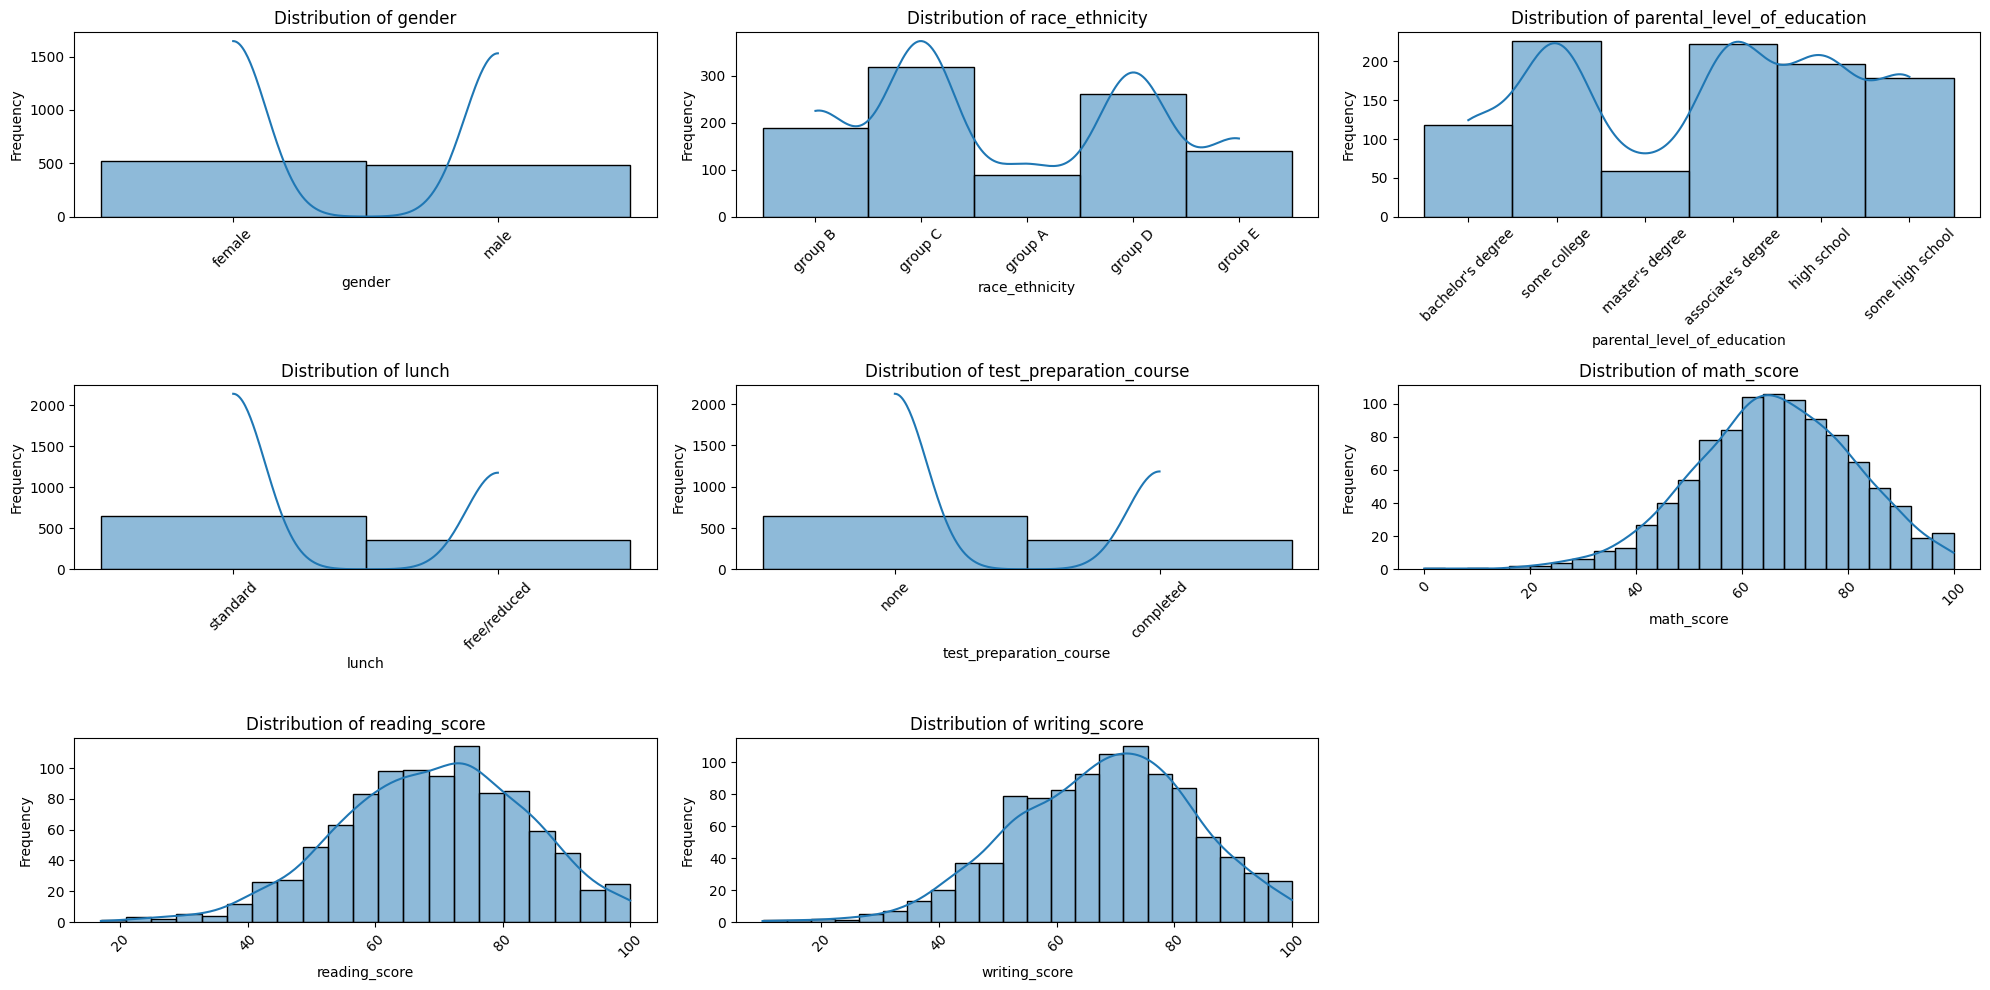

In [47]:
## plotting histograms for data analysis
all_cols = df.columns

plt.figure(figsize=(20,10))
for i, col in enumerate(all_cols, 1):
    plt.subplot(len(all_cols) // 3 + 1, 3, i)  # Adjust grid layout
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.xticks(rotation = 45)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [48]:
## checking the statistics of the data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [49]:
## Creating a new column or can say the Target column
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['total_score']

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64

In [50]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [51]:
## creating another feature that will calculate the average score
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [52]:
## observing the students who got full scores in each subject

reading_full = df[df['reading_score']==100]['average_score'].count()
writing_full = df[df['writing_score']==100]['average_score'].count()
math_full = df[df['math_score']==100]['average_score'].count()

print(f'Number of students with full marks in math: {math_full}')
print(f'Number of students with full marks in reading: {reading_full}')
print(f'Number of students with full marks in writing: {writing_full}')

Number of students with full marks in math: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [53]:
## observing the students who got less than 20
reading_less_20 = df[df['reading_score']<=20]['average_score'].count()
writing_less_20 = df[df['writing_score']<=20]['average_score'].count()
math_less_20 = df[df['math_score']<=20]['average_score'].count()

print(f'Number of students with less than 20 marks in math: {math_less_20}')
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')

Number of students with less than 20 marks in math: 4
Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3


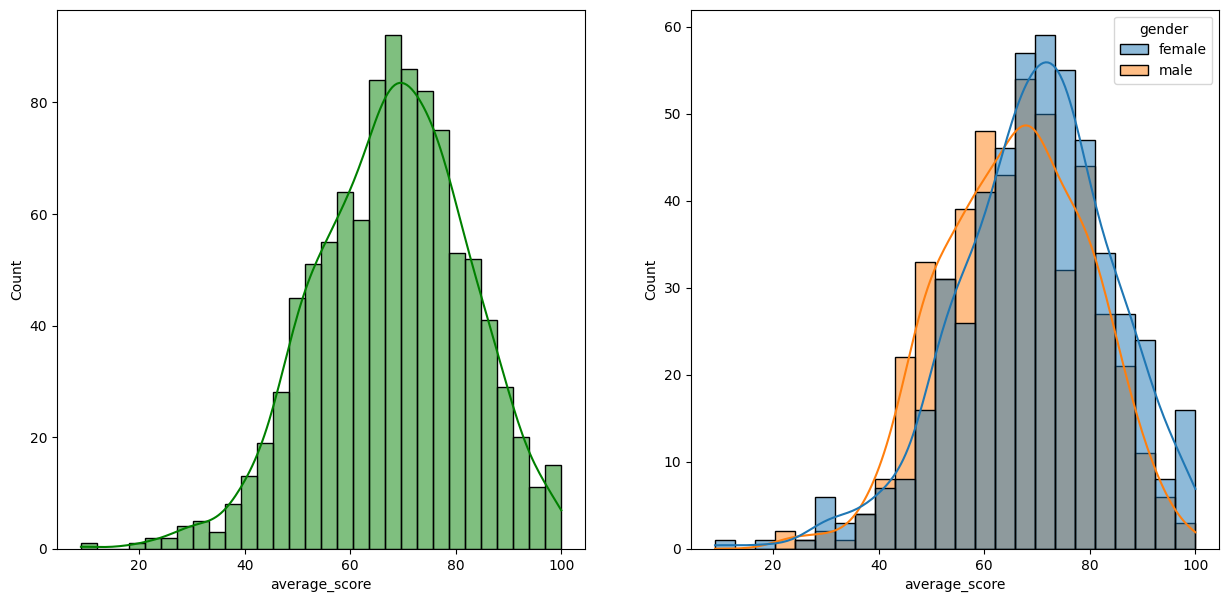

In [54]:
## lets see the histogram of average marks with respect to gender
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins =30, kde = True, color = 'g')
plt.subplot(122),
sns.histplot(data=df,x='average_score', kde = True, hue='gender')
plt.show()

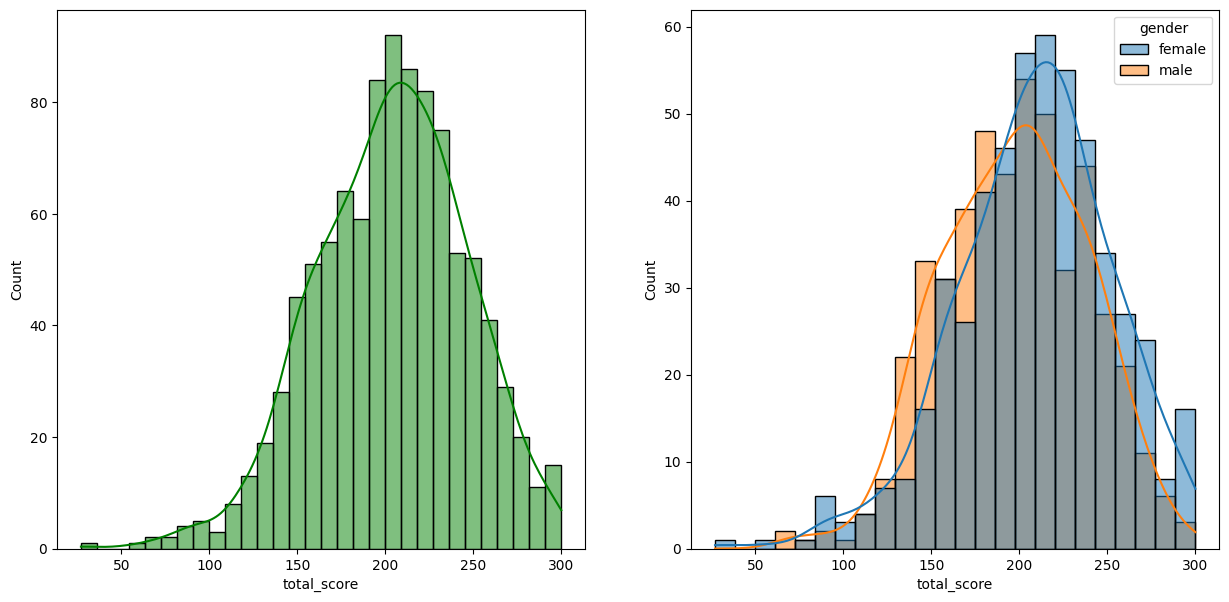

In [55]:
## lets see the histogram of total_score with respect to gender
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins =30, kde = True, color = 'g')
plt.subplot(122),
sns.histplot(data=df,x='total_score', kde = True, hue='gender')
plt.show()

## insights

Females students tend to perform well than men

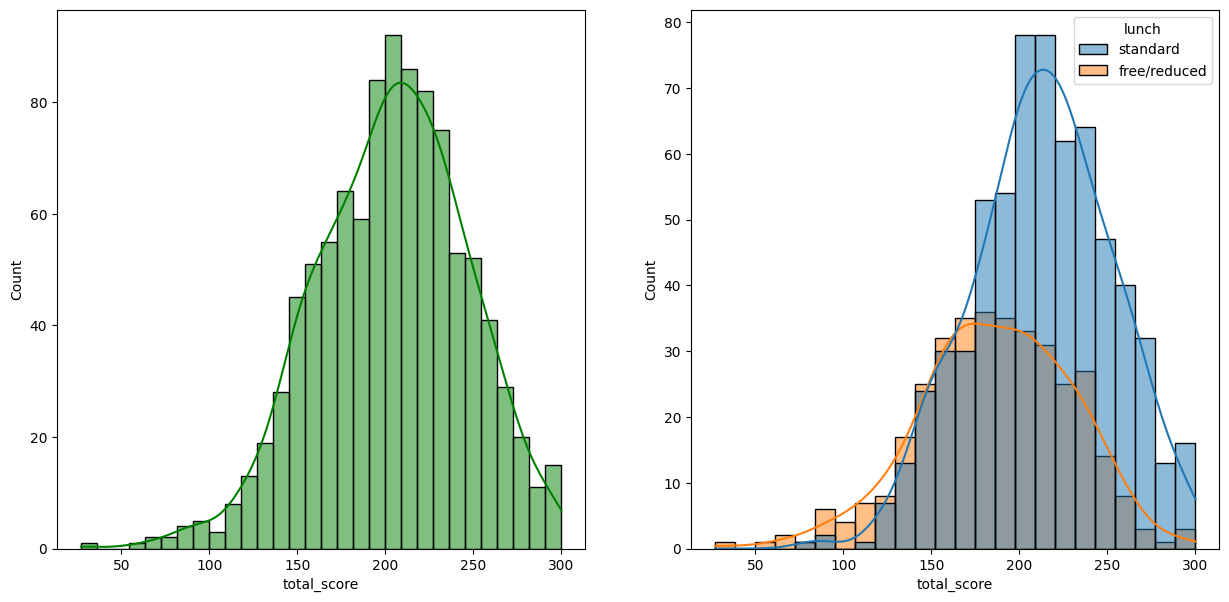

In [56]:
## lets see the histogram of total_score with respect to lunch timimng
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins =30, kde = True, color = 'g')
plt.subplot(122),
sns.histplot(data=df,x='total_score', kde = True, hue='lunch')
plt.show()

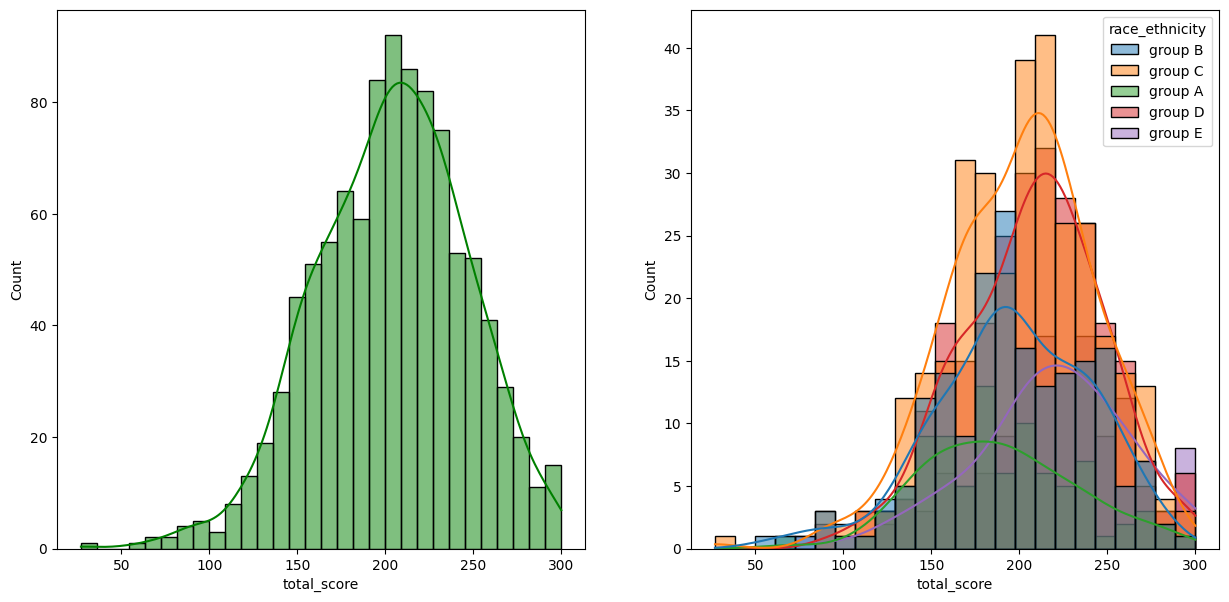

In [57]:
## lets see the histogram of total_score with respect to ethnicity
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins =30, kde = True, color = 'g')
plt.subplot(122),
sns.histplot(data=df,x='total_score', kde = True, hue='race_ethnicity')
plt.show()

<Axes: xlabel='average_score', ylabel='Count'>

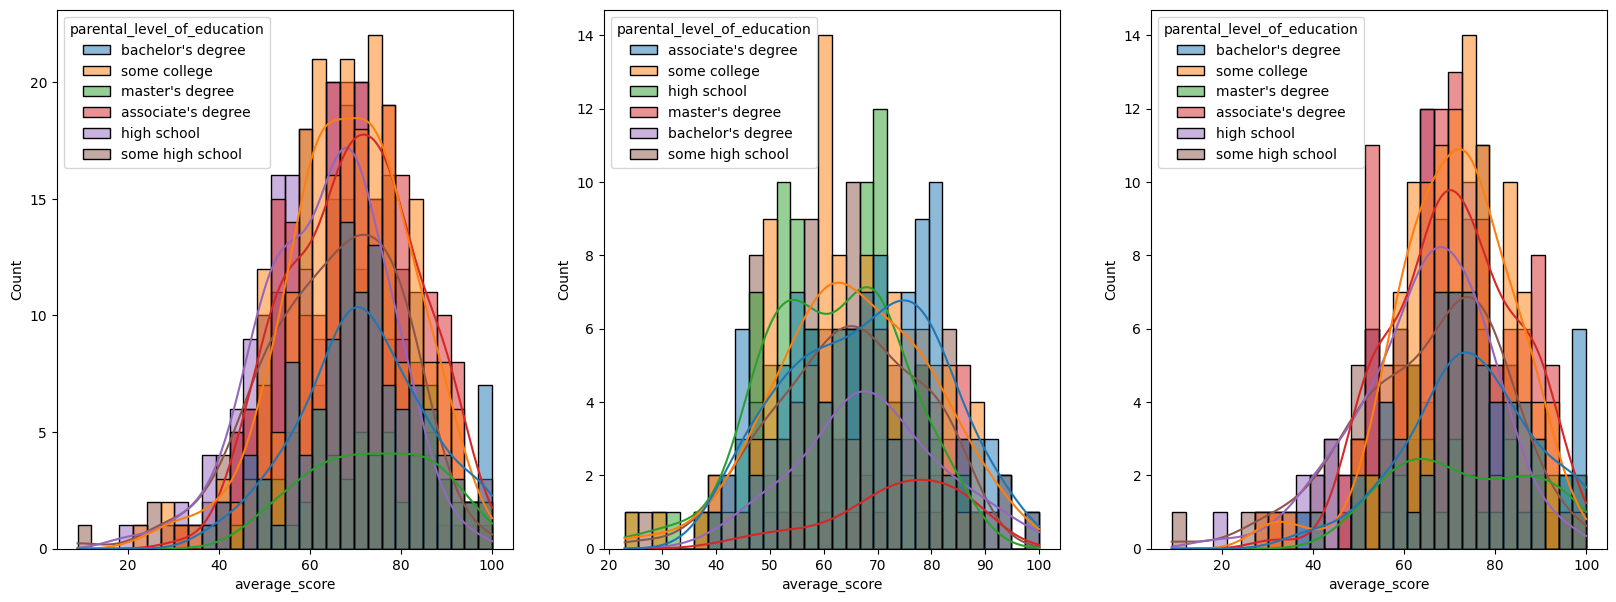

In [58]:
## lets see the histogram of total_score with respect to ethnicity
fig, axs = plt.subplots(1,3, figsize=(20,7))
plt.subplot(131)
sns.histplot(data=df, x='average_score', bins =30, kde = True, hue='parental_level_of_education')
plt.subplot(132),
sns.histplot(data=df[df['gender']=='male'], x='average_score', bins =30, kde = True, hue='parental_level_of_education')
plt.subplot(133),
sns.histplot(data=df[df['gender']=='female'], x='average_score', bins =30, kde = True, hue='parental_level_of_education')

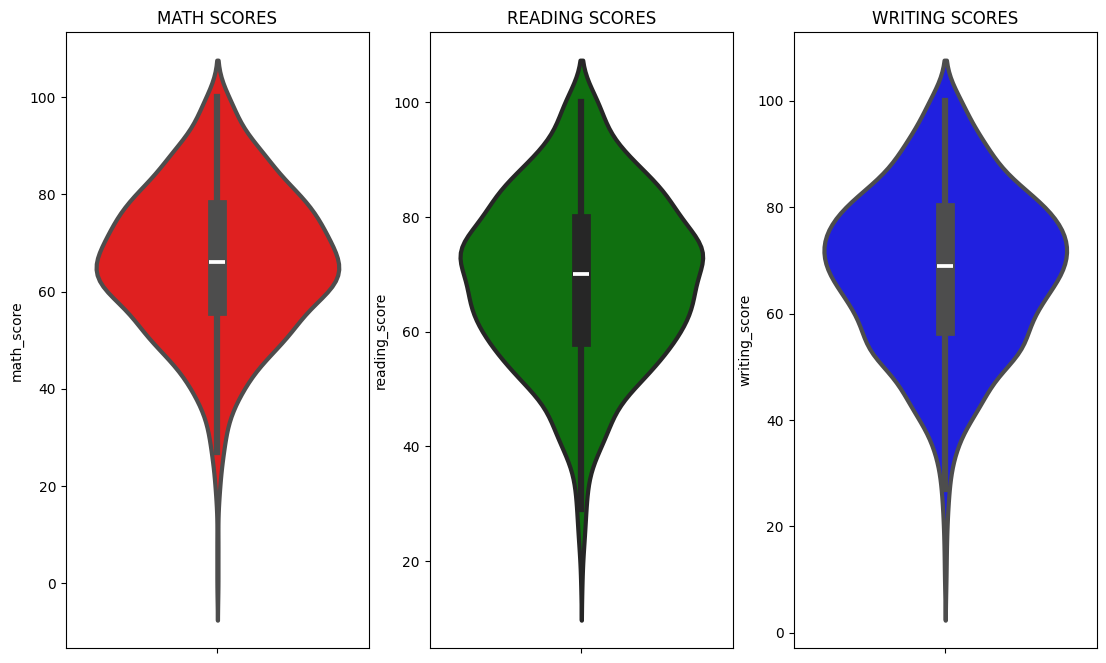

In [59]:
## Maximum score of students in all three subjects
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

## Insight

- most of the scores in maths are in between 60-80
- most of the scores in reading and writing are in between 60 - 80

## Multi variate analysis 

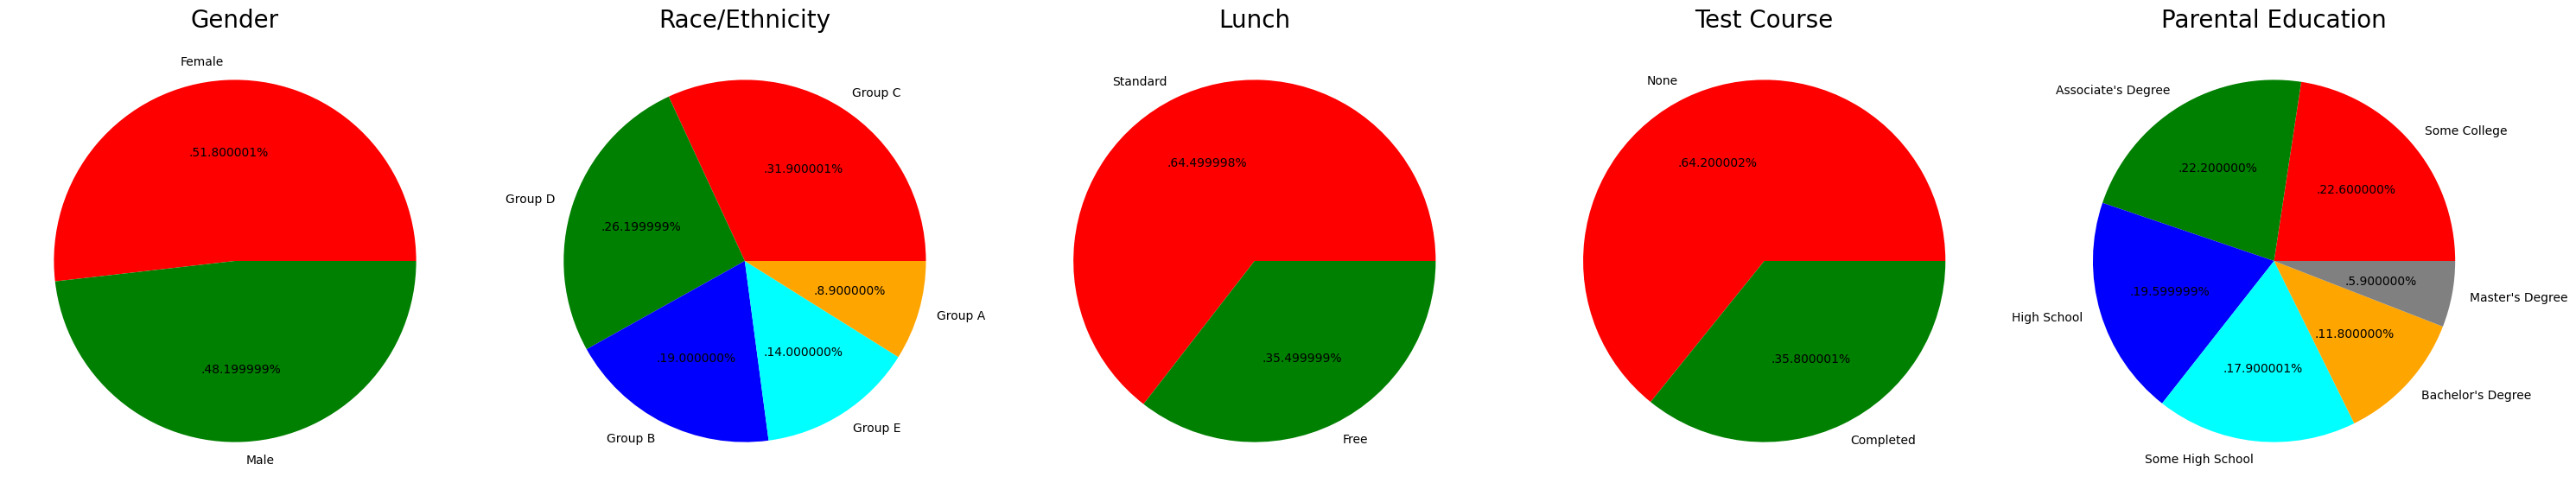

In [60]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

## Insight 
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## UNIVARIATE ANALYSIS

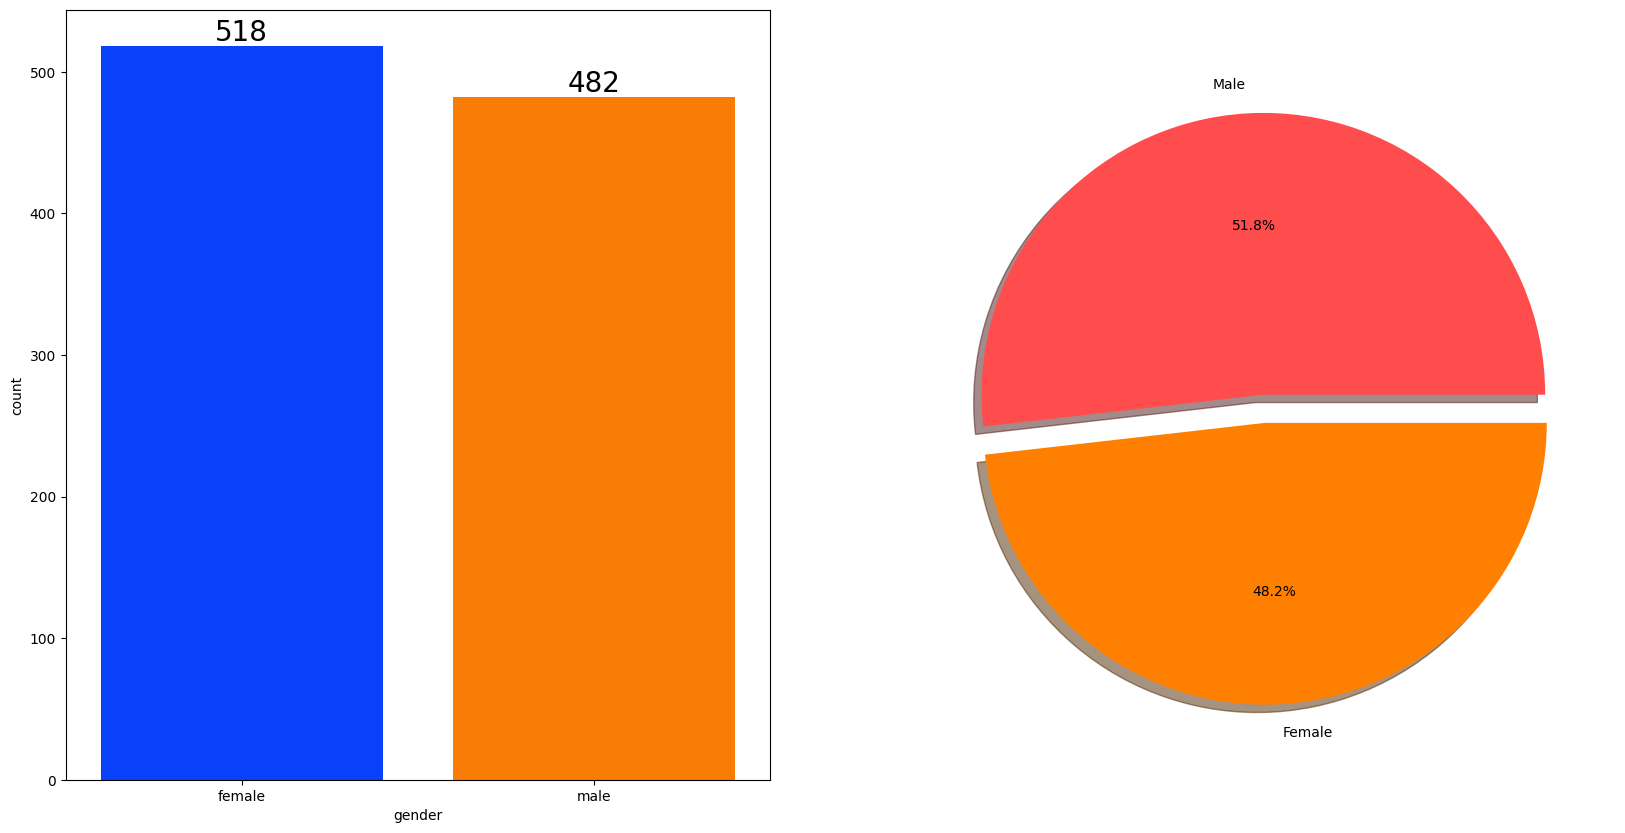

In [61]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [62]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

## BIVARIATE ANALYSIS

In [63]:
gender_group = df.groupby(['gender'])[['average_score', 'math_score']].mean()
gender_group

,average_score,math_score
gender,,
female,69.569498,63.633205
male,65.837483,68.728216


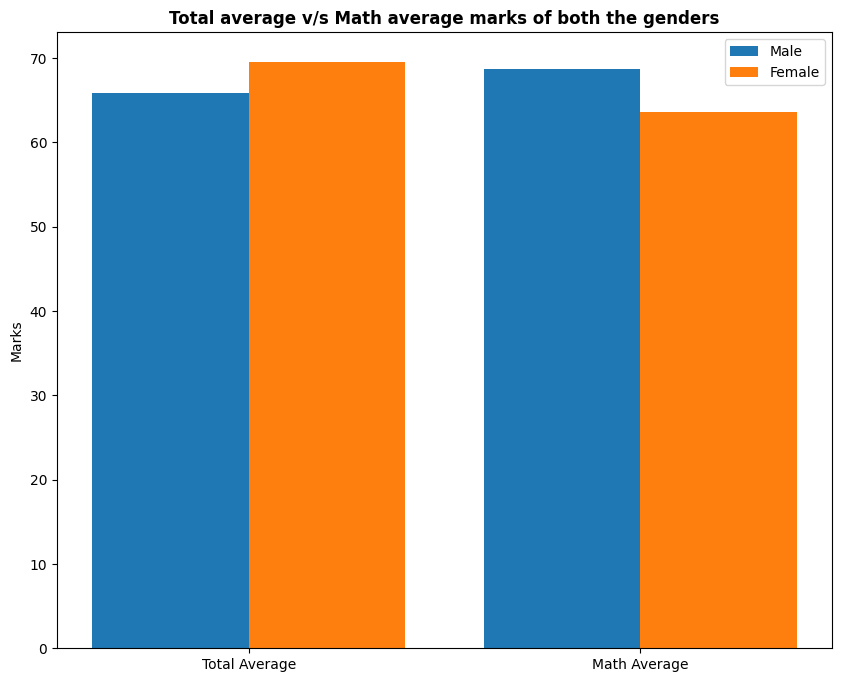

In [64]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'].iloc[0], gender_group['math_score'].iloc[0]]
male_scores = [gender_group['average_score'].iloc[1], gender_group['math_score'].iloc[1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

## Insight

- The above observation shows that males perform slight better at maths than female
- The above observation also states that feamles overall score is slight better than males.

## How is Race wise Distribution of the data.

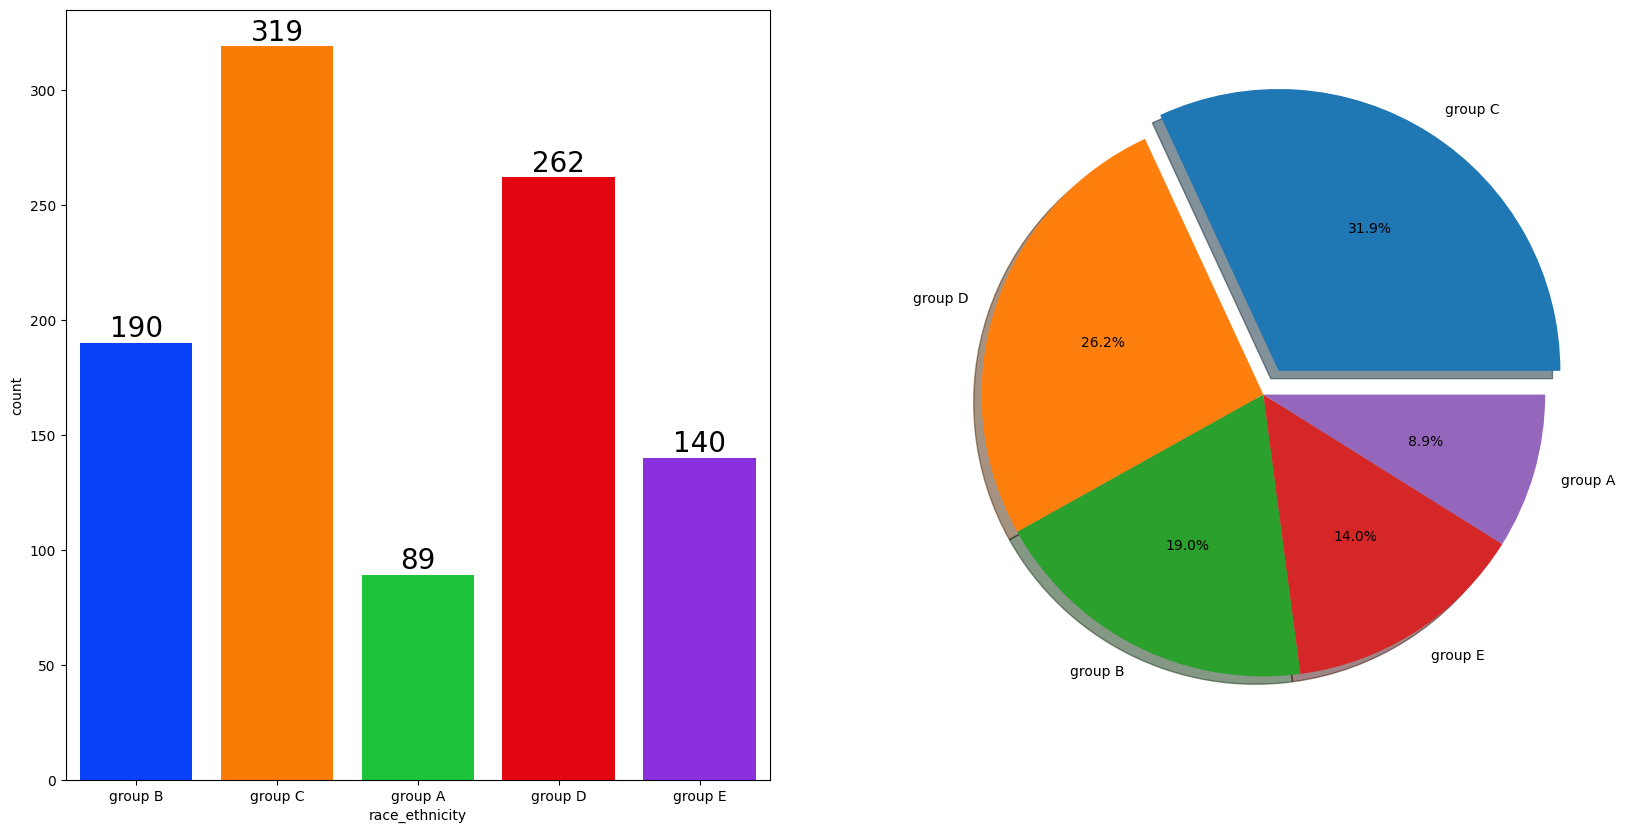

In [65]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%', shadow=True)
plt.show()

## Insights
- Most of the students are belonging from group C or group D
- Lowest number of students are from group A

## Bivariate analysis for the race_ethnicity column


In [66]:
group_data_2f = df.groupby(['race_ethnicity'])[['average_score','math_score', 'reading_score', 'writing_score']].mean()
group_data_2f

,average_score,math_score,reading_score,writing_score
race_ethnicity,,,,
group A,62.992509,61.629213,64.674157,62.674157
group B,65.468421,63.452632,67.352632,65.600000
group C,67.131661,64.463950,69.103448,67.827586
group D,69.179389,67.362595,70.030534,70.145038
group E,72.752381,73.821429,73.028571,71.407143


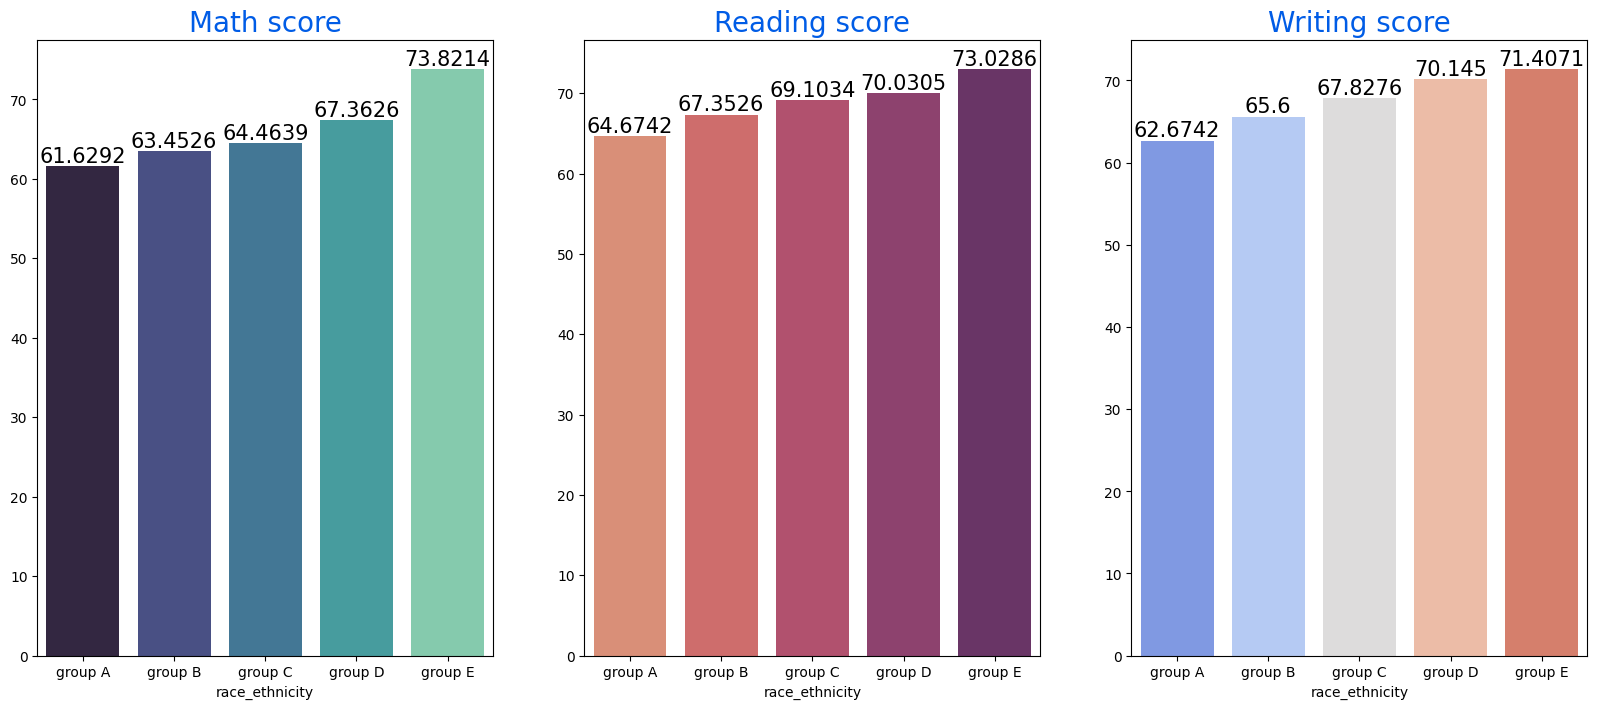

In [67]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data_2f['math_score'].index,y=group_data_2f['math_score'].values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=group_data_2f['reading_score'].index,y=group_data_2f['reading_score'].values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_data_2f['writing_score'].index,y=group_data_2f['writing_score'].values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

## Insights
- Group E students has scored the highest marks in all the three subject
- Group A students has scored the least marks in all the three subject


## Univariate analysis for Parental level of Education

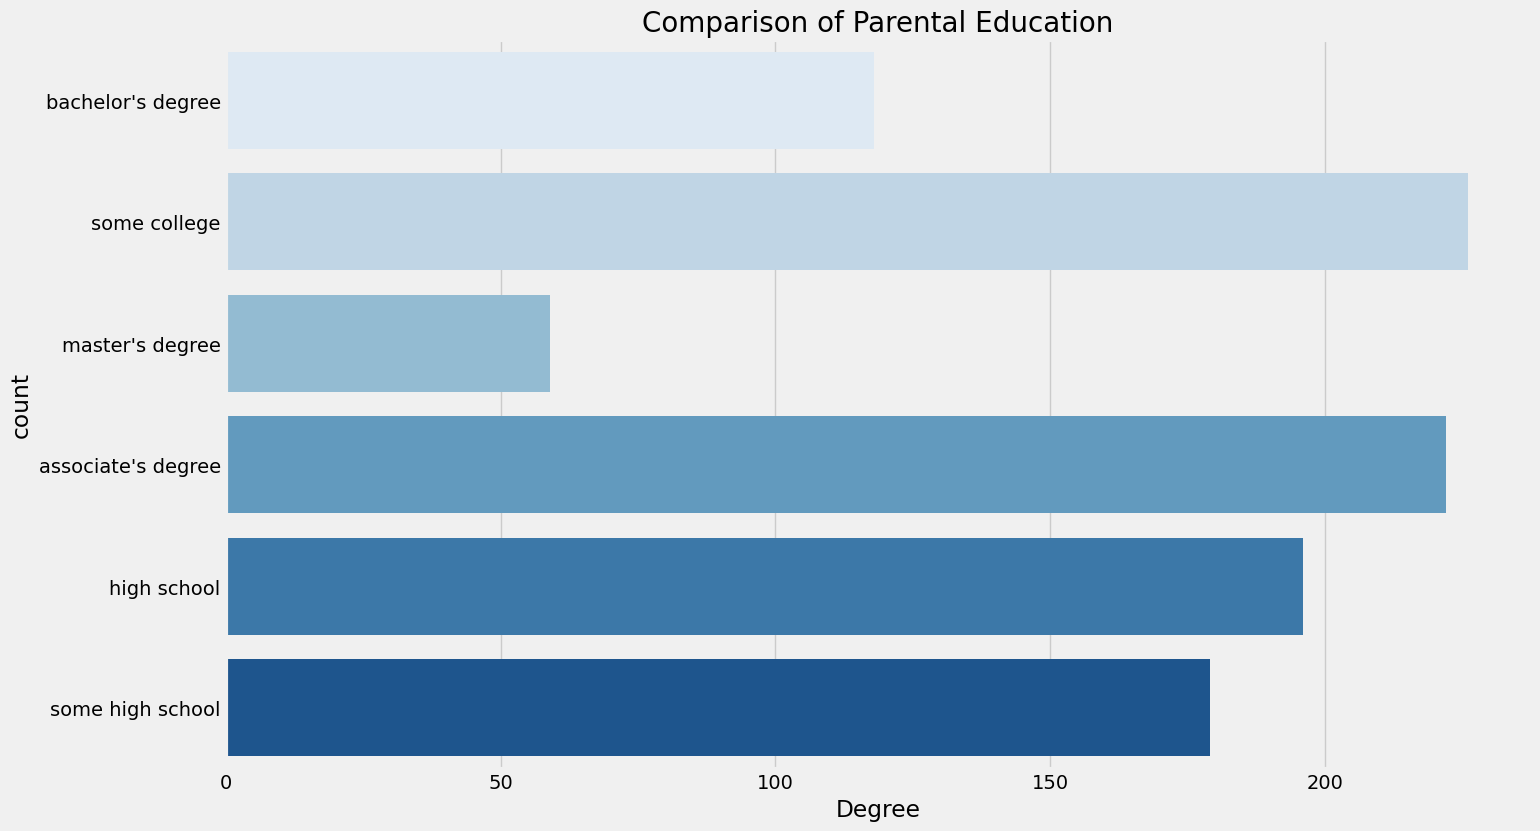

In [72]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

## Insights
- the class with the largest pupulation has some kind of college degrees.
- the least are the parents that have a Masters Degree.

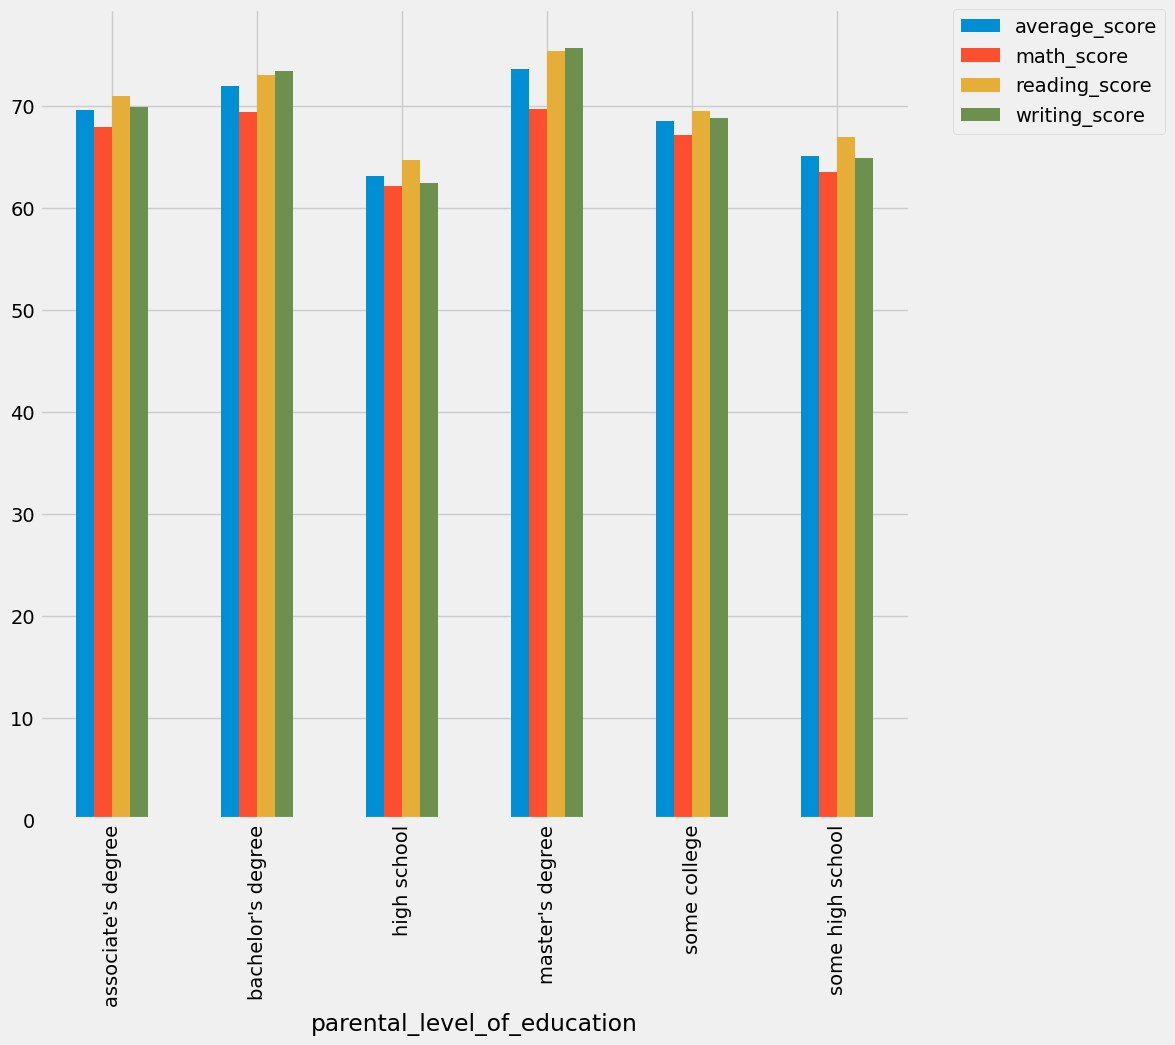

In [75]:
df.groupby(['parental_level_of_education'])[['average_score','math_score','reading_score','writing_score']].agg('mean').plot(kind='bar',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Insight
- This thu show that parental education has some impact on child's verall performance
- Students whose parents has some master's degree scored the highest
- students whose parents has only completed high school scored the lowest out of all the class

## Univaraite Analysis of the Lunch column

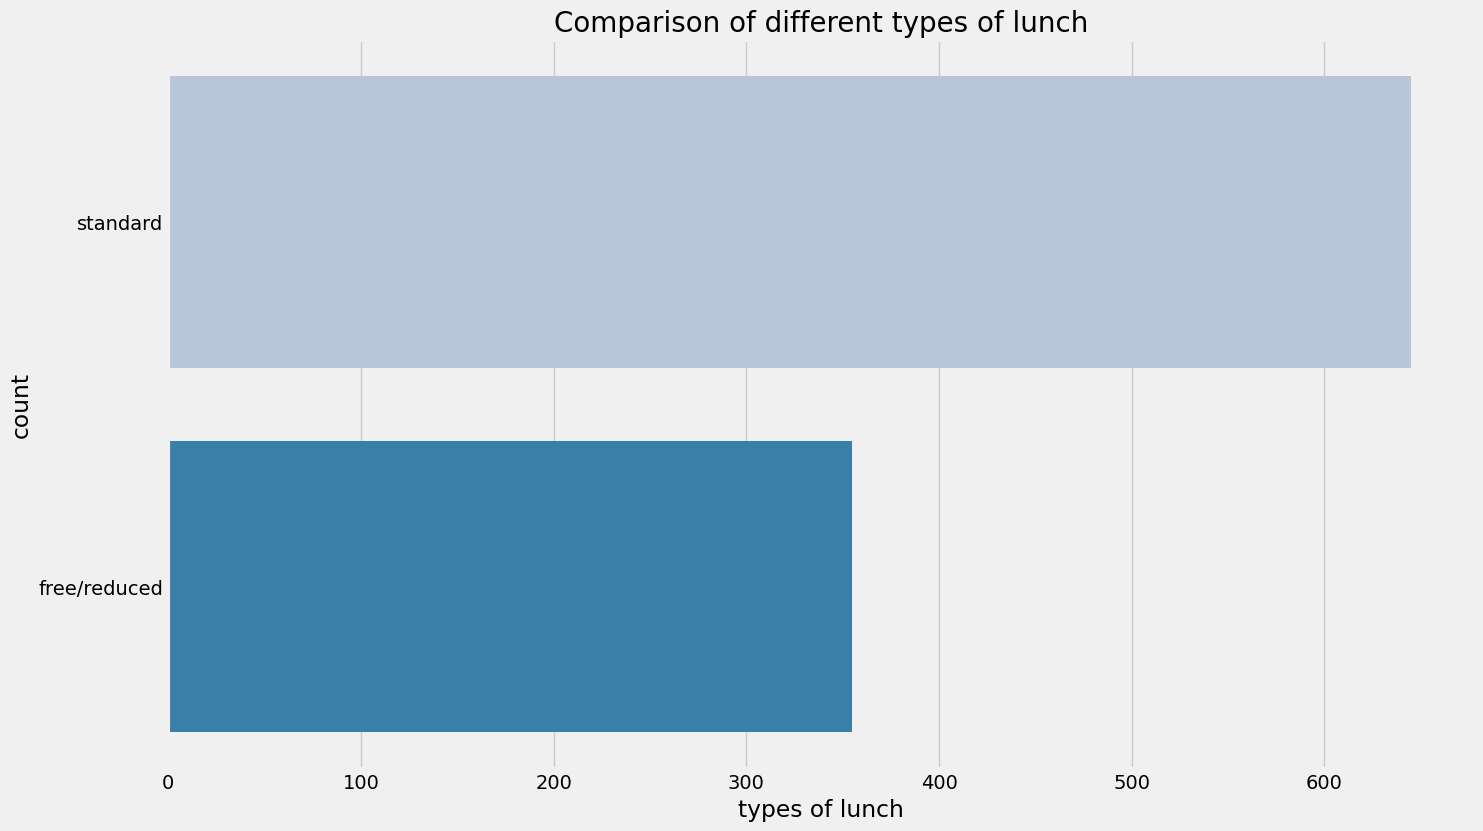

In [78]:
plt.rcParams['figure.figsize'] = (15, 9)

sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

## Insights
- Standard meals are more served than free/reduced meals

## BIVARIATE ANALYSIS (is lunch type intake has any impact on student's performance)

<Axes: xlabel='lunch', ylabel='writing_score'>

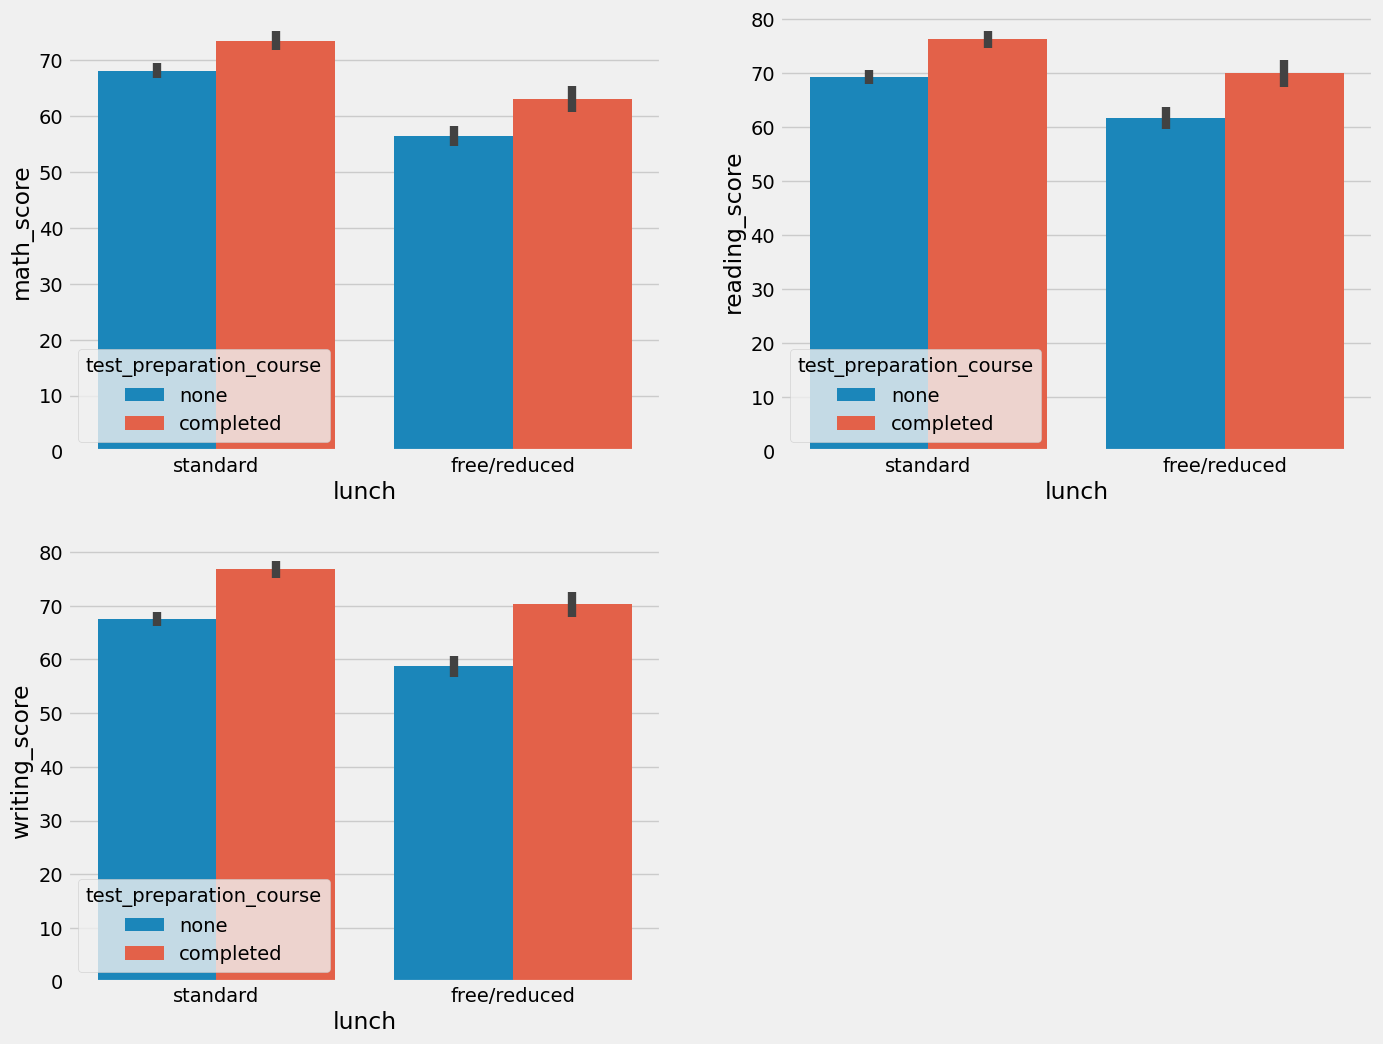

In [82]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

## Insights
- students with standard and who have completed the test prep course tend to score the highest
- whereas student who had free/reduced lunch and not completed the test prep course tend to score the lowest
- A thing to notice is students who completed the test prep course tend to score good despite of standard or free/reduced lumch.

## Checking Outliers:

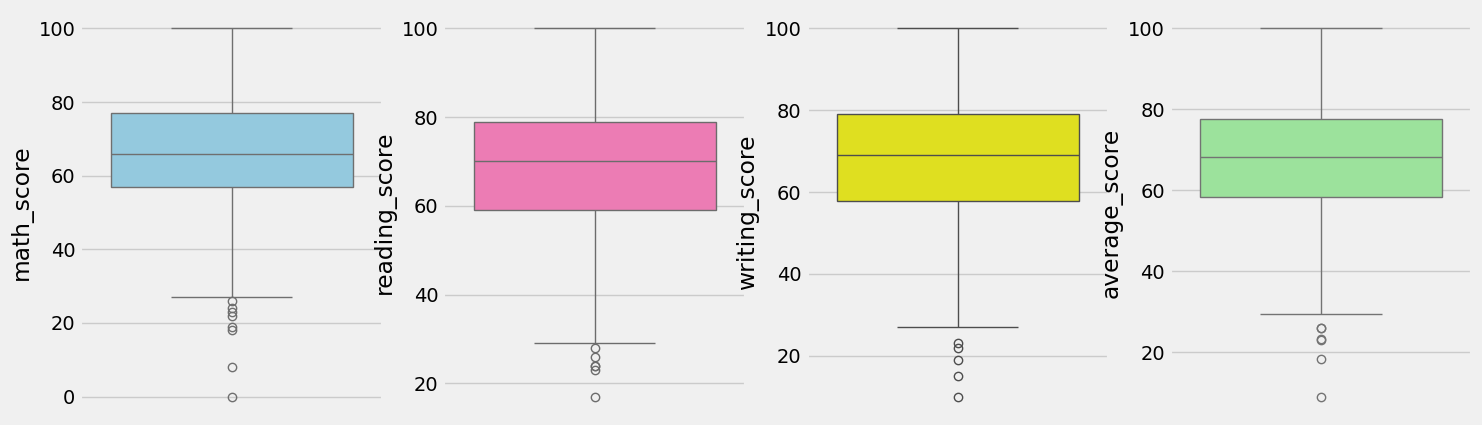

In [83]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

In [86]:
# Saving the data to csv for further modeltraining
df.to_csv('cleaned_data.csv')

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.